<a href="https://colab.research.google.com/github/aryan-at-ul/graph_neural_networks_basics/blob/main/tsp_using_som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=5fcc8dd1a4a1ff94ec08473b6f03a65306cba797b6132778ecada316e64daebc
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


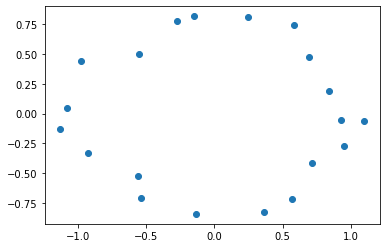

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.RandomState(10)
N_points = 20
N_neurons = N_points*2
t = np.linspace(0, np.pi*2, N_points)
x = np.cos(t)+(np.random.rand(N_points)-.5)*.3
y = np.sin(t)*.8+(np.random.rand(N_points)-.5)*.2
points = np.array([x,y]).T
plt.scatter(x, y)

/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.7/dist-packages/minisom.py:374: UserWarning: PCA initialization inappropriate:One of the dimensions of the map is 1.
  warn(msg)


[[ 1.0998086  -0.06096567]
 [ 0.83856341  0.19235521]
 [ 0.69518615  0.47602752]
 [ 0.58404119  0.74687902]
 [ 0.2463532   0.80849893]
 [-0.14959468  0.81757396]
 [-0.27125594  0.77568227]
 [-0.55121204  0.49786673]
 [-0.97485886  0.44478517]
 [-1.07854725  0.04837911]
 [-1.13029471 -0.13420326]
 [-0.92659696 -0.33491192]
 [-0.56205265 -0.52107244]
 [-0.53394354 -0.70823277]
 [-0.13708667 -0.84373251]
 [ 0.36364561 -0.82802379]
 [ 0.56958192 -0.71930185]
 [ 0.71375556 -0.41548458]
 [ 0.9486094  -0.27635673]
 [ 0.9258004  -0.05527987]]


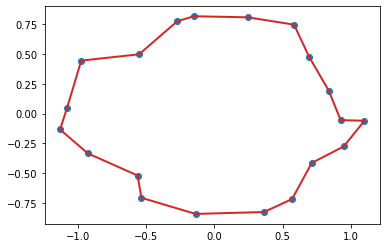

In [17]:
from minisom import MiniSom

som = MiniSom(1, N_neurons*2, 2, sigma=10,
              neighborhood_function='gaussian', random_seed=50)
max_iter = 2000


som.pca_weights_init(points)

print(points)

paths_x = []
paths_y = []
for i in np.arange(max_iter):
    i_point = i % len(points)
    som.update(points[i_point], som.winner(points[i_point]), i, max_iter)
    visit_order = np.argsort([som.winner(p)[1] for p in points])
    # print(print(visit_order))
    visit_order = np.concatenate((visit_order, [visit_order[0]]))
    paths_x.append(points[visit_order][:,0])
    paths_y.append(points[visit_order][:,1])
    
plt.scatter(x, y, label='point to visit')
plt.plot(paths_x[-1], paths_y[-1],
         'C3', linewidth=2, label='path')

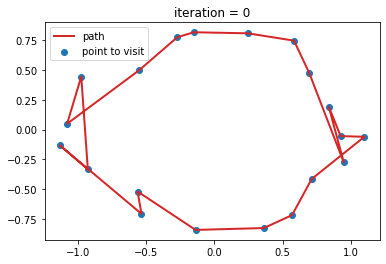

In [4]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
plt.scatter(x, y, label='point to visit')
ln, = plt.plot([], [], 'C3', linewidth=2, label='path')
plt.legend()

def update(frame):
    ln.set_data(paths_x[frame], paths_y[frame])
    plt.title('iteration = %d' % frame)
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(max_iter),
                    interval=10, repeat=False, blit=False)
HTML(ani.to_html5_video())